# Figure 2: Spliced leader usage frequency

**Summary:**<br>

This notebook compiles the scripts that were used to generate the Figure 2.

- **Panel b:** Measure of total SL1 and SL2 variants detected in our reads

---
<br>



## Import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

## Settings for saving figures as pdf

In [2]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Set environmental constants

In [3]:
# Set path where files are stored
path = '/Volumes/elegans/rna_sequencing'

## Opening Dataset file

In [4]:
# Open dataset generated as part of the pre-processing step
dataset = pd.read_csv(f'{path}/dataset_+SSP+SL+HAIRPIN.tsv', sep='\t')

----

<br>

# Panel b: Measure of SL1 and SL2 variants detect in sequencing experiments

In [5]:
# Sense reads obtained in the SL1_1 experiment are not taken in account
# this avoid the introduction of SL1 sequence that would result from the use of the SL1 primer during 2nd strand synthesis

data = pd.concat([dataset[(dataset['run'] != 'SL1_1')], 
                  dataset[(dataset['run'] == 'SL1_1') & (dataset['read_orientation'] == 'antisense')]])

In [6]:
# count all rows with robust variant SL values
sl_count = pd.DataFrame(data[(data['VARIANT_SL_FOUND']=='FOUND')]['SL'].value_counts())


# now count all unique SL values and consider uncertain variants as SL2.X

count = pd.DataFrame()
count.loc['Total','count']=0
count.loc['SL.X','count']=0
count.loc['SL2.X','count']=0

for SL, row in sl_count.iterrows():
    
    # add to total
    count.loc['Total','count'] = count.loc['Total','count'] + row['SL']
    
    # if reads matched for SL1 and any SL2 variant -> added to SL.X
    if 'SL1' in SL and 'SL2' in SL:
        count.loc['SL.X','count'] = count.loc['SL.X','count'] + row['SL']
    
    else:
        
        # reads with several SL2 matchs who scored the same -> added to SL2.X
        if '/' in SL:
            count.loc['SL2.X','count'] = count.loc['SL2.X','count'] + row['SL']

        # unique SL1 or SL2 variant detected
        else:
            count.loc[SL,'count'] = row['SL']

    
# clean up resulting dataframe
count['count'] = count['count'].astype(int)
count = count.sort_index()

count

,count
SL.X,79
SL1,2472462
SL2.1,39731
SL2.10,6917
SL2.12,11465
SL2.14,7438
SL2.15,6739
SL2.16,10988
SL2.17,5984
SL2.18,14997


In [7]:
# Count of SL1 and SL2 reads

sl1 = count[count.index.str.contains('SL1')]['count'].sum()
slx = count[count.index.str.contains('SL.X')]['count'].sum()
sl2 = count[count.index.str.contains('SL2')]['count'].sum()

SL_counts = pd.DataFrame.from_dict({'SL1':sl1, 'SL2':sl2,'SL.X':slx}, orient='index', columns=['count']).T

SL_counts

,SL1,SL2,SL.X
count,2472462,186888,79


In [8]:
# Count of SL2 variants 

sl2_x = count[count.index=='SL2.X']['count'].sum()
sl2_1 = count[count.index=='SL2.1']['count'].sum()
sl2_5 = count[count.index=='SL2.5']['count'].sum()
sl2_8 = count[count.index=='SL2.8']['count'].sum()
sl2_9 = count[count.index=='SL2.9']['count'].sum()
sl2_10 = count[count.index=='SL2.10']['count'].sum()
sl2_12 = count[count.index=='SL2.12']['count'].sum()
sl2_14 = count[count.index=='SL2.14']['count'].sum()
sl2_15 = count[count.index=='SL2.15']['count'].sum()
sl2_16 = count[count.index=='SL2.16']['count'].sum()
sl2_17 = count[count.index=='SL2.17']['count'].sum()
sl2_18 = count[count.index=='SL2.18']['count'].sum()


var = {'SL2.1':sl2_1, 'SL2.5':sl2_5,'SL2.8':sl2_8, 'SL2.9':sl2_9, 'SL2.10':sl2_10, 'SL2.12':sl2_12,
       'SL2.14':sl2_14,'SL2.15':sl2_15, 'SL2.16':sl2_16, 'SL2.17':sl2_17, 'SL2.18':sl2_18, 'SL2.X':sl2_x}

SL2variants_counts = pd.DataFrame.from_dict(var, orient='index', columns=['count']).T

SL2variants_counts

,SL2.1,SL2.5,SL2.8,SL2.9,SL2.10,SL2.12,SL2.14,SL2.15,SL2.16,SL2.17,SL2.18,SL2.X
count,39731,13704,27743,7555,6917,11465,7438,6739,10988,5984,14997,33627


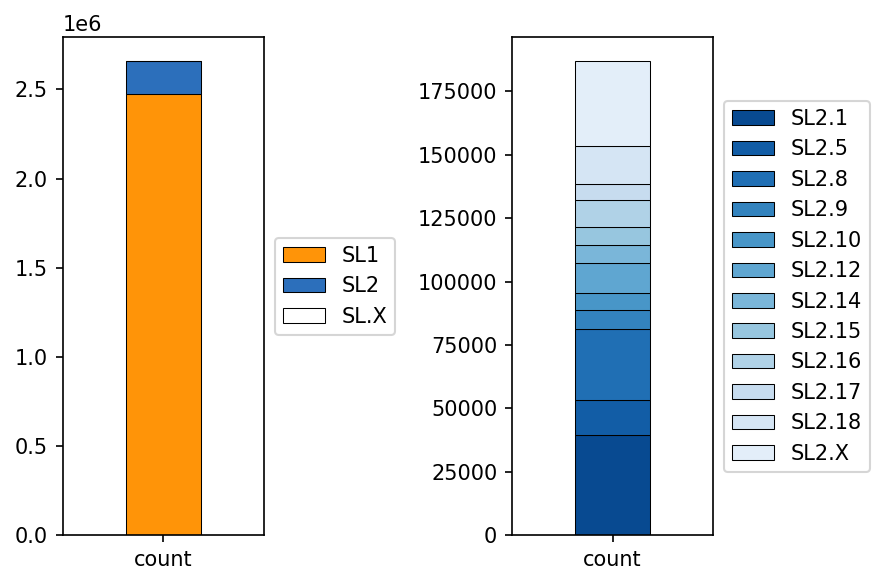

In [9]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,4), ncols=2, sharey=False, dpi=150)

SL_counts.plot(kind='bar', stacked=True, ax=ax[0], rot=0, width=0.3,
               color=['#ff9408','#2c6fbb','#ffffff'], linewidth=0.5, edgecolor='black')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))


SL2variants_counts.plot(kind='bar', stacked=True, ax=ax[1],rot=0, width=0.3,
                        color=cm.Blues_r(np.linspace(0.1, 0.9, 12)), linewidth=0.5, edgecolor='black')

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# general plot settings
plt.subplots_adjust(left=0.1, bottom=None, right=0.98, top=None, wspace=1, hspace=None)
plt.tight_layout()

# save
plt.savefig('Fig2.b-SL1_&_SL2reads.pdf', dpi=800, bbox_inches='tight')

<font size="4">**Figure 2.b:**<br></font>
Quantification of reads with high quality splice leader sequence reveals the usage frequency of each of the sls genes. SL2.X indicates reads for which the specific SL2 genes could not be unambiguously identified.

<br>